In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

 BTP		    DATA_HPC		   HPC_LAB   predictions.jpg
'Colab Notebooks'  'Getting started.pdf'   Ishika   'Sanchit 3D CNN'


In [3]:
import math
import numpy as np
def random_mini_batches_GCN1(X, Y, L, mini_batch_size, seed):
    
    m = X.shape[0]
    mini_batches = []
    np.random.seed(seed)
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))
    shuffled_L1 = L[permutation, :].reshape((L.shape[0], L.shape[1]), order = "F")
    shuffled_L = shuffled_L1[:, permutation].reshape((L.shape[0], L.shape[1]), order = "F")

    num_complete_minibatches = math.floor(m / mini_batch_size)+(m % mini_batch_size != 0)
    for k in range(0, num_complete_minibatches):       
        mini_batch_X = shuffled_X[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), :]
        mini_batch_L = shuffled_L[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m)]
        mini_batch = (mini_batch_X, mini_batch_Y, mini_batch_L)
        mini_batches.append(mini_batch)
    #mini_batch = (X, X1, Y, L) 
    #mini_batches.append(mini_batch)
    
    return mini_batches

In [4]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [5]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3 MB 74 kB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.1 MB 34.0 MB/s 
     |████████████████████████████████| 488 kB 36.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [6]:
!pip install tensorflow-gpu==1.14.0
!pip install tensorflow-determinism

     |████████████████████████████████| 377.1 MB 6.7 kB/s 
  Created wheel for tensorflow-determinism: filename=tensorflow_determinism-0.3.0-py3-none-any.whl size=9158 sha256=fcf426380b1c22e6fcd210ff978bf6081637803af49acba0c23928e4d680fe2c
  Stored in directory: /root/.cache/pip/wheels/d2/be/33/2b27e81e5d40b4bfb7c103ac6c6c5e81fdbcf40d2af5078529
Successfully built tensorflow-determinism


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as scio
import scipy.io as sio
from tfdeterminism import patch
patch()
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [8]:
import math
import numpy as np
def create_batches(X, Y, L, mini_batch_size):
    
    m = X.shape[0]
    mini_batches = []

    permutation = list(np.arange(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))
    shuffled_L1 = L[permutation, :].reshape((L.shape[0], L.shape[1]), order = "F")
    shuffled_L = shuffled_L1[:, permutation].reshape((L.shape[0], L.shape[1]), order = "F")

    num_complete_minibatches = math.floor(m / mini_batch_size)+(m % mini_batch_size != 0)
    for k in range(0, num_complete_minibatches):       
        mini_batch_X = shuffled_X[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), :]
        mini_batch_L = shuffled_L[k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m), k * mini_batch_size : min(k * mini_batch_size + mini_batch_size,m)]
        mini_batch = (mini_batch_X, mini_batch_Y, mini_batch_L)
        mini_batches.append(mini_batch)
    #mini_batch = (X, Y, L) 
    #mini_batches.append(mini_batch)
    
    return mini_batches

In [9]:
def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

In [10]:
def create_placeholders(n_x, n_y):
    isTraining = tf.placeholder_with_default(True, shape=())
    x_in = tf.placeholder(tf.float32, [None, n_x], name="x_in")
    y_in = tf.placeholder(tf.float32, [None, n_y], name="y_in")
    lap_train = tf.placeholder(tf.float32, [None, None], name="lap_train")

    return x_in, y_in, lap_train, isTraining

In [11]:
def initialize_parameters():
   
    tf.set_random_seed(1)

    x_w1 = tf.get_variable("x_w1", [6,128], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    x_b1 = tf.get_variable("x_b1", [128], initializer = tf.zeros_initializer())

    x_w2 = tf.get_variable("x_w2", [128,2], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    x_b2 = tf.get_variable("x_b2", [2], initializer = tf.zeros_initializer())    

    
    parameters = {"x_w1": x_w1,
                  "x_b1": x_b1,
                  "x_w2": x_w2,
                  "x_b2": x_b2}
                  
    return parameters

In [12]:
def GCN_layer(x_in, L_, weights):
    x_mid = tf.matmul(x_in, weights)
    x_out = tf.matmul(L_, x_mid)

    return x_out

In [13]:
def mynetwork(x, parameters, Lap, isTraining, momentums = 0.9):

    with tf.name_scope("x_layer_1"):

         x_z1_bn = tf.layers.batch_normalization(x, momentum = momentums, training = isTraining)             
         x_z1 = GCN_layer(x_z1_bn, Lap, parameters['x_w1']) + parameters['x_b1']
         x_z1_bn = tf.layers.batch_normalization(x_z1, momentum = momentums, training = isTraining)
         x_a1 = tf.nn.relu(x_z1_bn)      
         
    with tf.name_scope("x_layer_3"):
        
         x_z2_bn = tf.layers.batch_normalization(x_a1, momentum = momentums, training = isTraining)        
         x_z2 = GCN_layer(x_z2_bn, Lap, parameters['x_w2']) + parameters['x_b2']         

    l2_loss =  tf.nn.l2_loss(parameters['x_w1']) + tf.nn.l2_loss(parameters['x_w2'])
                
    return x_z2, l2_loss

In [14]:
def mynetwork_optimaization(y_est, y_re, l2_loss, reg, learning_rate, global_step):
    
    y_re = tf.squeeze(y_re, name = 'y_re')
    
    with tf.name_scope("cost"):
         cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_est, labels = y_re)) +  reg * l2_loss
         
    with tf.name_scope("optimization"):
         update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
         optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost,  global_step=global_step)
         optimizer = tf.group([optimizer, update_ops])
         
    return cost, optimizer

In [15]:
def network_accuracy(x_out, y_in):
    
    correct_prediction = tf.equal(tf.argmax(x_out, 1), tf.argmax(y_in, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
         
    return accuracy

In [16]:
from tensorflow.python.framework import ops

In [17]:
def train_mynetwork(x_train, x_test, y_train, y_test, L_train, L_test, learning_rate_base = 0.001, beta_reg = 0.001, num_epochs = 200, minibatch_size = 32, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 1
    (m, n_x) = x_train.shape
    (m, n_y) = y_train.shape

    costs = []
    costs_dev = []
    train_acc = []
    val_acc = []

    x_in, y_in, lap_train, isTraining = create_placeholders(n_x,n_y)

    parameters = initialize_parameters()

    with tf.name_scope("network"):
        x_out, l2_loss = mynetwork(x_in, parameters, lap_train, isTraining)

    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(learning_rate_base, global_step, 50 * m / minibatch_size, 0.5,
                                               staircase=True)

    with tf.name_scope("optimization"):
        cost, optimizer = mynetwork_optimaization(x_out, y_in, l2_loss, beta_reg, learning_rate, global_step)

    with tf.name_scope("metrics"):
         accuracy = network_accuracy(x_out, y_in)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        sess.run(init)

        # Do the training loop
        (m1, s) = x_test.shape
        num_test_minibatches = int(m1 / minibatch_size) + (m1 % minibatch_size != 0)
        print(num_test_minibatches)
        minibatches_test = random_mini_batches_GCN1(x_test, y_test, L_test, minibatch_size, seed)
        data_to_save = []
        for epoch in range(num_epochs + 1):
            epoch_cost = 0.  # Defines a cost related to an epoch
            epoch_acc = 0.
            num_minibatches = int(m / minibatch_size)+(m % minibatch_size != 0) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches_GCN1(x_train, y_train, L_train, minibatch_size, seed)
            


            for minibatch in minibatches:
                # Select a minibatch
                (batch_x, batch_y, batch_l) = minibatch
                #print(batch_x.shape,batch_x1.shape,batch_y.shape,batch_l.shape)
                #print(type(batch_x),type(batch_x1),type(batch_y),type(batch_l))
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _, minibatch_cost, minibatch_acc = sess.run([optimizer, cost, accuracy],
                                                            feed_dict={x_in: batch_x, y_in: batch_y,
                                                                       lap_train: batch_l, isTraining: True})

                epoch_cost += minibatch_cost / (num_minibatches)
                epoch_acc += minibatch_acc / (num_minibatches)

            if print_cost == True and (epoch) % 25 == 0:
                epoch_cost_dev = 0
                epoch_acc_dev = 0
                
                for minibatch in minibatches_test:
                  # Select a minibatch
                  (batch_x, batch_y, batch_l) = minibatch
                  # IMPORTANT: The line that runs the graph on a minibatch.
                  # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                  _, minibatch_cost, minibatch_acc = sess.run([optimizer, cost, accuracy],
                                                            feed_dict={x_in: batch_x, y_in: batch_y,
                                                                       lap_train: batch_l, isTraining: False})

                  epoch_cost_dev += minibatch_cost / (num_test_minibatches)
                  epoch_acc_dev += minibatch_acc / (num_test_minibatches) 
                data_to_save.append((epoch, epoch_cost, epoch_cost_dev, epoch_acc, epoch_acc_dev))
                print("epoch %i: Train_loss: %f, Val_loss: %f, Train_acc: %f, Val_acc: %f" % (
                epoch, epoch_cost, epoch_cost_dev, epoch_acc, epoch_acc_dev))

            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                train_acc.append(epoch_acc)
                costs_dev.append(epoch_cost_dev)
                val_acc.append(epoch_acc_dev)

        #predicting the final output on the test cases:
        pred = []
        for minibatch in minibatches_test:
                  # Select a minibatch
                  (batch_x, batch_y, batch_l) = minibatch
                  # IMPORTANT: The line that runs the graph on a minibatch.
                  # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                  pred_val, _, minibatch_cost, minibatch_acc = sess.run([x_out, optimizer, cost, accuracy],
                                                            feed_dict={x_in: batch_x, y_in: batch_y,
                                                                       lap_train: batch_l, isTraining: False})
                  pred_val = np.transpose(pred_val)
                  pred.append([batch_y,pred_val])


        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.plot(np.squeeze(costs_dev))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        # plot the accuracy
        plt.plot(np.squeeze(train_acc))
        plt.plot(np.squeeze(val_acc))
        plt.ylabel('accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        return parameters, val_acc,pred, epoch_cost_dev*100, epoch_acc_dev*100

In [20]:
Train_X = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/Train_X.mat')
TrLabel = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/TrLabel.mat')
Test_X = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/Test_X.mat')
TeLabel = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/TeLabel.mat')
Train_L = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/Train_L.mat')
Test_L = scio.loadmat('/content/drive/My Drive/HPC_LAB/Abhishek Kumar/data_detection/Test_L.mat')



Train_X = Train_X['Train_X']
Test_X = Test_X['Test_X']
TrLabel = TrLabel['TrLabel']
TeLabel = TeLabel['TeLabel']

Train_L = Train_L['Train_L']
Test_L = Test_L['Test_L']

print(TrLabel.shape)
print(TeLabel.shape)
print(TrLabel.dtype)
TrLabel = convert_to_one_hot(TrLabel, 2)
TeLabel = convert_to_one_hot(TeLabel, 2)
TrLabel = TrLabel.T
TeLabel = TeLabel.T
print(Train_X.shape,Test_X.shape,TrLabel.shape,TeLabel.shape,Train_L.shape,Test_L.shape)

(8400, 1)
(3601, 1)
int64
(8400, 6) (3601, 6) (8400, 2) (3601, 2) (8400, 8400) (3601, 3601)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

113
epoch 0: Train_loss: 0.182241, Val_loss: 0.078139, Train_acc: 0.940708, Val_acc: 0.976249
epoch 25: Train_loss: 0.086922, Val_loss: 0.049765, Train_acc: 0.975523, Val_acc: 0.986726
epoch 50: Train_loss: 0.076606, Val

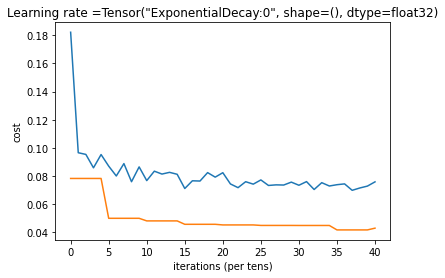

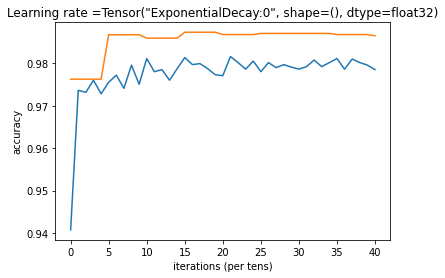

Parameters have been trained!


In [21]:
parameters, val_acc, prediction, test_cost, test_acc = train_mynetwork(Train_X, Test_X, TrLabel, TeLabel, Train_L, Test_L)

In [22]:
y_test = []
y_pred = []
print(len(prediction))
for i in range(0,len(prediction)):
  mini_test = prediction[i][1]
  mini_test = np.transpose(mini_test)
  mini_pred = prediction[i][0]
  for j in mini_test:
    y_test.append(j)
  for j in mini_pred:
    y_pred.append(j)

113


In [23]:
print(len(y_test),len(y_pred))

3601 3601


In [24]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)
print(y_test.shape)

(3601, 2)


In [25]:
from operator import truediv

In [26]:
def AA_andEachClassAccuracy(confusion_matrix):
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

In [27]:
print(y_test)

[[ 2.7556121 -3.2249508]
 [-4.16901    4.7939477]
 [ 0.4787082 -0.5130258]
 ...
 [ 1.6772326 -2.1240957]
 [-5.09016    5.5488124]
 [-4.8297606  4.122326 ]]


In [28]:
def reports (y_pred,y_test,name='data'):
    #start = time.time()
    Y_pred = y_pred
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start)
    if name=='data':
      target_names = ['Zero','One']
    elif name == 'IP':
        target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']
    elif name == 'SA':
        target_names = ['Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow','Fallow_smooth',
                        'Stubble','Celery','Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green_weeds',
                        'Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk','Lettuce_romaine_7wk',
                        'Vinyard_untrained','Vinyard_vertical_trellis']
    elif name == 'PU':
        target_names = ['Asphalt','Meadows','Gravel','Trees', 'Painted metal sheets','Bare Soil','Bitumen',
                        'Self-Blocking Bricks','Shadows']
    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    
    return classification, confusion, oa*100, each_acc*100, aa*100, kappa*100

In [29]:
classification, confusion, oa, each_acc, aa, kappa = reports(y_pred,y_test)
classification = str(classification)
confusion = str(confusion)
file_name = "/content/drive/My Drive/HPC_LAB/Abhishek Kumar/classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('{} Test loss (%)'.format(test_cost))
    x_file.write('\n')
    x_file.write('{} Test accuracy (%)'.format(test_acc))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{} Kappa accuracy (%)'.format(kappa))
    x_file.write('\n')
    x_file.write('{} Overall accuracy (%)'.format(oa))
    x_file.write('\n')
    x_file.write('{} Average accuracy (%)'.format(aa))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{}'.format(classification))
    x_file.write('\n')
    x_file.write('{}'.format(confusion))